<a href="https://colab.research.google.com/github/chathu96/Cricket-Pitch-Analysis/blob/main/Cricket_Pitch_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from keras.preprocessing.image import ImageDataGenerator

#copy path to training data and validation data 
Path_train="/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train"
Path_valid="/content/drive/MyDrive/Cricket Pitch Classification/Dataset/valid"

image_generator = ImageDataGenerator(rescale=1./255)

#Images are reshaped to [224,224] as this is the requirement for VGG16 network
dataset = image_generator.flow_from_directory(Path_train, #contains images to training set 
                                              target_size=(224, 224),
                                              class_mode='categorical')
validation_set=image_generator.flow_from_directory(Path_valid, # contains images of validation set
                                              target_size=(224, 224),
                                              class_mode='categorical')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

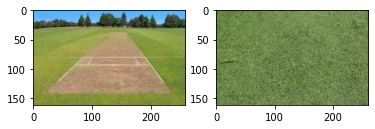

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img.imread('/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/Batting Pitch/batting - 001.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/Bowling Pitch/bowling - 001.jpg'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
test_size=400
batch_size=32
epochs=25
train_path='/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train'
test_path='/content/drive/MyDrive/Cricket Pitch Classification/Dataset/valid'
target_size=(300,300) #resize all images to 300x300
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = [0.8, 1.2],
                                   fill_mode='nearest',        
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
                  train_path,
                  target_size=target_size,#  
                  batch_size=batch_size,
                  class_mode='categorical',
                  subset='training')
validation_generator = train_datagen.flow_from_directory(
                       train_path,
                       target_size=target_size,
                       batch_size=batch_size,
                       class_mode='categorical',
                       subset='validation')

Found 416 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [17]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob
import numpy as np

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

x = []
list_of_files = glob.glob('/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/Batting Pitch/*.jpg')
for file in list_of_files:
  img = load_img(file)  # this is a PIL image
  x.append(img_to_array(img))
x = np.array(x) # feed this x to your datagen.flow

i = 0

for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/preprocessing/', save_format='jpeg'):

    i += 1

    if i > 10000:

        break  # otherwise the generator would loop indefinitely

In [8]:
images = ImageDataGenerator().flow_from_directory(r'/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/Batting Pitch')
datagen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.3,
    height_shift_range=0.3, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    vertical_flip=True,
    fill_mode='nearest')

for i in images:
    x = img_to_array(images[i])
    x = x.reshape((1,) + x.shape)
    j=0
    for batch in datagen.flow(x,batch_size=1,save_to_dir='preview',save_prefix='/content/drive/MyDrive/Cricket Pitch Classification/Dataset/train/preprocessing',save_format='jpeg'):
        i+=1
        if i>20:
            break

Found 0 images belonging to 0 classes.


(array([], shape=(0, 150, 150, 3), dtype=float32), array([], dtype=float32))